In [1]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_excel('3号线隧道烘箱点位汇总表-1.xlsx', sheet_name = 'IOS_MESHX3_AI_0001')

In [4]:
#df.head(5)

,IOS_MESHX3_AI_0001,Unnamed: 1,Unnamed: 2
0,时间戳,数据质量,数据值
1,2020-03-01 00:00:00,Good,79.1382
2,2020-03-01 00:01:00,Good,79.044
3,2020-03-01 00:02:00,Good,78.9498
4,2020-03-01 00:03:00,Good,78.8556


In [2]:
df = pd.read_excel('3号线隧道烘箱点位汇总表-1.xlsx', sheet_name = None)

In [6]:
full_table = pd.DataFrame()

In [9]:
#for name, sheet in sheets_dict.items():
#    sheet['sheet'] = name
#    sheet = sheet.rename(columns=lambda x: x.split('\n')[-1])
#    full_table = full_table.append(sheet)

In [35]:
sum(1 for _ in df.items())

30

In [37]:
df.keys()

dict_keys(['3号线隧道烘箱-储存点位44个', 'IOS_MESHX3_AI_0001', 'IOS_MESHX3_AI_0002', 'IOS_MESHX3_AI_0005', 'IOS_MESHX3_AI_0006  ', 'IOS_MESHX3_AI_0007', 'IOS_MESHX3_AI_0009', 'IOS_MESHX3_AI_0010', 'IOS_MESHX3_AI_0011  ', 'IOS_MESHX3_AI_0014', 'IOS_MESHX3_AI_0016', 'IOS_MESHX3_AI_0017', 'IOS_MESHX3_AI_0018', 'IOS_MESHX3_AI_0019', 'IOS_MESHX3_AI_0020', 'IOS_MESHX3_AI_0021', 'IOS_MESHX3_AI_0022', 'IOS_MESHX3_AI_0023', 'IOS_MESHX3_AI_0024', 'IOS_MESHX3_AI_0025', 'IOS_MESHX3_AI_0026', 'IOS_MESHX3_AI_0027', 'IOS_MESHX3_AI_0028', 'IOS_MESHX3_AI_0029', 'IOS_MESHX3_AI_0030', 'IOS_MESHX3_AI_0031', 'IOS_MESHX3_AI_0041', 'IOS_MESHX3_AI_0042', 'IOS_MESHX3_AI_0043', 'IOS_MESHX3_AI_0044'])

In [40]:
firstSheet = df['IOS_MESHX3_AI_0001']

In [44]:
firstSheet.head(5)

,IOS_MESHX3_AI_0001,Unnamed: 1,Unnamed: 2
0,时间戳,数据质量,数据值
1,2020-03-01 00:00:00,Good,79.1382
2,2020-03-01 00:01:00,Good,79.044
3,2020-03-01 00:02:00,Good,78.9498
4,2020-03-01 00:03:00,Good,78.8556


In [47]:
firstSheet.columns = firstSheet.iloc[0]

In [62]:
firstSheet = firstSheet.drop(firstSheet.index[0])
firstSheet = firstSheet.rename(columns={'时间戳':'TIME', '数据质量':'DATALABEL','数据值':'IOS_MESHX3_AI_0001'})
firstSheet.head(5)

,TIME,DATALABEL,IOS_MESHX3_AI_0001
9,2020-03-01 00:08:00,Good,78.3846
10,2020-03-01 00:09:00,Good,78.2904
11,2020-03-01 00:10:00,Good,78.1962
12,2020-03-01 00:11:00,Good,78.1019
13,2020-03-01 00:12:00,Good,78.0077


In [58]:
df['IOS_MESHX3_AI_0001'].head(5)

,时间戳,数据质量,数据值
0,时间戳,数据质量,数据值
1,2020-03-01 00:00:00,Good,79.1382
2,2020-03-01 00:01:00,Good,79.044
3,2020-03-01 00:02:00,Good,78.9498
4,2020-03-01 00:03:00,Good,78.8556


In [7]:
count = 0
full_table_1 = pd.DataFrame()
for name, sheet in df.items():
    if name.startswith('I') and count < 15:
        sheet.columns = sheet.iloc[0]
        sheet = sheet.drop(sheet.index[0])
        sheet = sheet.rename(columns={'时间戳':'TIME', '数据质量':'DATALABEL','数据值':name})
        print('sheet-good-len', len(sheet[sheet['DATALABEL'] == 'Good']), len(sheet))
        #print(sheet['DATALABEL'].unique())
        print('fulltable-len', len(full_table_1))
        count = count + 1
        print(count)
        if count == 1:
            full_table_1 = sheet
        else:
            full_table_1 = full_table_1.merge(sheet, left_on=['TIME', 'DATALABEL'], right_on=['TIME', 'DATALABEL'])

sheet-good-len 352199 352808
fulltable-len 0
1
sheet-good-len 352199 352808
fulltable-len 352808
2
sheet-good-len 352214 352808
fulltable-len 352822
3
sheet-good-len 351667 352808
fulltable-len 352835
4
sheet-good-len 342265 342859
fulltable-len 352344
5
sheet-good-len 352214 352808
fulltable-len 342492
6
sheet-good-len 352214 352808
fulltable-len 342700
7
sheet-good-len 342265 342859
fulltable-len 343116
8
sheet-good-len 352199 352808
fulltable-len 343884
9
sheet-good-len 352199 352808
fulltable-len 345484
10
sheet-good-len 342265 342859
fulltable-len 348684
11
sheet-good-len 352214 352808
fulltable-len 354828
12
sheet-good-len 352199 352808
fulltable-len 367372
13
sheet-good-len 352199 352808
fulltable-len 392460
14
sheet-good-len 352214 352808
fulltable-len 442636
15


In [10]:
count = 0
full_table_2 = pd.DataFrame()
for name, sheet in df.items():
    if name.startswith('I'):
        sheet.columns = sheet.iloc[0]
        sheet = sheet.drop(sheet.index[0])
        sheet = sheet.rename(columns={'时间戳':'TIME', '数据质量':'DATALABEL','数据值':name})
        count = count + 1
        if count >= 16:
            print('sheet-good-len', len(sheet[sheet['DATALABEL'] == 'Good']), len(sheet))
            #print(sheet['DATALABEL'].unique())
            print('fulltable-len', len(full_table_2))
            print(count)
        
        if count == 16:
            full_table_2 = sheet
        elif count > 16:
            full_table_2 = full_table_2.merge(sheet, left_on=['TIME', 'DATALABEL'], right_on=['TIME', 'DATALABEL'])

sheet-good-len 342250 342859
fulltable-len 0
16
sheet-good-len 352199 352808
fulltable-len 342859
17
sheet-good-len 352199 352808
fulltable-len 342872
18
sheet-good-len 342265 342859
fulltable-len 342898
19
sheet-good-len 352214 352808
fulltable-len 342931
20
sheet-good-len 352214 352808
fulltable-len 343031
21
sheet-good-len 342250 342859
fulltable-len 343231
22
sheet-good-len 352214 352808
fulltable-len 343615
23
sheet-good-len 352199 352808
fulltable-len 344399
24
sheet-good-len 342250 342859
fulltable-len 345967
25
sheet-good-len 352214 352808
fulltable-len 349039
26
sheet-good-len 352214 352808
fulltable-len 355247
27
sheet-good-len 342250 342859
fulltable-len 367663
28
sheet-good-len 352214 352808
fulltable-len 392239
29


In [19]:
full_table_1.head(5)

,TIME,DATALABEL,IOS_MESHX3_AI_0001,IOS_MESHX3_AI_0002,IOS_MESHX3_AI_0005,IOS_MESHX3_AI_0006,IOS_MESHX3_AI_0007,IOS_MESHX3_AI_0009,IOS_MESHX3_AI_0010,IOS_MESHX3_AI_0011,IOS_MESHX3_AI_0014,IOS_MESHX3_AI_0016,IOS_MESHX3_AI_0017,IOS_MESHX3_AI_0018,IOS_MESHX3_AI_0019,IOS_MESHX3_AI_0020,IOS_MESHX3_AI_0021
0,2020-03-01 00:00:00,Good,79.1382,84.1751,59.607,39.9728,45.9268,25.827,27.5784,29.8366,0,0,0,0,0.16381,20.8564,0
1,2020-03-01 00:01:00,Good,79.044,84.0665,59.5105,39.9295,45.866,25.8183,27.5655,29.8173,0,0,0,0,0.164078,20.8611,0
2,2020-03-01 00:02:00,Good,78.9498,83.9579,59.4139,39.8861,45.8053,25.8096,27.5526,29.7981,0,0,0,0,0.164346,20.8659,0
3,2020-03-01 00:03:00,Good,78.8556,83.8493,59.3174,39.8428,45.7445,25.8009,27.5398,29.7789,0,0,0,0,0.164613,20.8707,0
4,2020-03-01 00:04:00,Good,78.7614,83.7407,59.2208,39.7995,45.6838,25.7922,27.5269,29.7596,0,0,0,0,0.164881,20.8754,0


In [70]:
full_table_1.set_index('TIME', inplace = True)

In [74]:
type(full_table_1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [76]:
full_table_1.index

DatetimeIndex(['2020-03-01 00:00:00', '2020-03-01 00:01:00',
               '2020-03-01 00:02:00', '2020-03-01 00:03:00',
               '2020-03-01 00:04:00', '2020-03-01 00:05:00',
               '2020-03-01 00:06:00', '2020-03-01 00:07:00',
               '2020-03-01 00:08:00', '2020-03-01 00:09:00',
               ...
               '2020-10-31 23:51:00', '2020-10-31 23:52:00',
               '2020-10-31 23:53:00', '2020-10-31 23:54:00',
               '2020-10-31 23:55:00', '2020-10-31 23:56:00',
               '2020-10-31 23:57:00', '2020-10-31 23:58:00',
               '2020-10-31 23:59:00', '2020-11-01 00:00:00'],
              dtype='datetime64[ns]', name='TIME', length=542988, freq=None)

In [60]:
import pandas as pd  
C = pd.Series(['22:00:00','22:30:00','23:00:00'])

df = pd.DataFrame()
df['C'] = C

#set index to the obervations after converting them to type datetimeIndex
df.index = pd.to_datetime(C)
print(df)

print(df.between_time(df['C'][0],df['C'][2]))

                            C
2020-12-03 22:00:00  22:00:00
2020-12-03 22:30:00  22:30:00
2020-12-03 23:00:00  23:00:00
                            C
2020-12-03 22:00:00  22:00:00
2020-12-03 22:30:00  22:30:00
2020-12-03 23:00:00  23:00:00


In [118]:
import datetime
datetime?

Type:        module
String form: <module 'datetime' from 'c:\\users\\lfu163986\\appdata\\local\\programs\\python\\python38\\lib\\datetime.py'>
File:        c:\users\lfu163986\appdata\local\programs\python\python38\lib\datetime.py
Docstring:   Fast implementation of the datetime type.


In [166]:
#full_table_1 = full_table_1.reset_index()
#full_table_1['DAY'] = full_table_1['TIME'].apply(lambda x:x.date())
full_table_1['ACTUALTIME'] = full_table_1['TIME'].apply(lambda x:x.time())

In [180]:
full_table_1.head(5)

,level_0,index,TIME,DATALABEL,IOS_MESHX3_AI_0001,IOS_MESHX3_AI_0002,IOS_MESHX3_AI_0005,IOS_MESHX3_AI_0006,IOS_MESHX3_AI_0007,IOS_MESHX3_AI_0009,...,IOS_MESHX3_AI_0011,IOS_MESHX3_AI_0014,IOS_MESHX3_AI_0016,IOS_MESHX3_AI_0017,IOS_MESHX3_AI_0018,IOS_MESHX3_AI_0019,IOS_MESHX3_AI_0020,IOS_MESHX3_AI_0021,DAY,ACTUALTIME
0,0,0,2020-03-01 00:00:00,Good,79.1382,84.1751,59.607,39.9728,45.9268,25.827,...,29.8366,0,0,0,0,0.16381,20.8564,0,2020-03-01,00:00:00
1,1,1,2020-03-01 00:01:00,Good,79.044,84.0665,59.5105,39.9295,45.866,25.8183,...,29.8173,0,0,0,0,0.164078,20.8611,0,2020-03-01,00:01:00
2,2,2,2020-03-01 00:02:00,Good,78.9498,83.9579,59.4139,39.8861,45.8053,25.8096,...,29.7981,0,0,0,0,0.164346,20.8659,0,2020-03-01,00:02:00
3,3,3,2020-03-01 00:03:00,Good,78.8556,83.8493,59.3174,39.8428,45.7445,25.8009,...,29.7789,0,0,0,0,0.164613,20.8707,0,2020-03-01,00:03:00
4,4,4,2020-03-01 00:04:00,Good,78.7614,83.7407,59.2208,39.7995,45.6838,25.7922,...,29.7596,0,0,0,0,0.164881,20.8754,0,2020-03-01,00:04:00


In [175]:
full_table_1.drop('ACTUALTIME', axis=1)
full_table_1['ACTUALTIME'] = pd.to_datetime(full_table_1['TIME'],format= '%H:%M:%S' ).dt.time

In [184]:
full_table_1.keys()

Index(['level_0', 'index', 'TIME', 'DATALABEL', 'IOS_MESHX3_AI_0001',
       'IOS_MESHX3_AI_0002', 'IOS_MESHX3_AI_0005', 'IOS_MESHX3_AI_0006  ',
       'IOS_MESHX3_AI_0007', 'IOS_MESHX3_AI_0009', 'IOS_MESHX3_AI_0010',
       'IOS_MESHX3_AI_0011  ', 'IOS_MESHX3_AI_0014', 'IOS_MESHX3_AI_0016',
       'IOS_MESHX3_AI_0017', 'IOS_MESHX3_AI_0018', 'IOS_MESHX3_AI_0019',
       'IOS_MESHX3_AI_0020', 'IOS_MESHX3_AI_0021', 'DAY', 'ACTUALTIME'],
      dtype='object', name=0)

In [152]:
groupedvalue = full_table_1.groupby(by = 'DAY')

In [201]:
newdf = pd.DataFrame(columns = ['DAY','005','006','007','LABEL'])
#for name, group in groupedvalue:
    

In [202]:

count = 0;
for name, group in groupedvalue:
    #print(str(name))
    value1 = group[(group['ACTUALTIME'] > datetime.time(11,0,0)) & (group['ACTUALTIME'] < datetime.time(15,0,0))]['IOS_MESHX3_AI_0005'].mean()
    value2 = group[(group['ACTUALTIME'] > datetime.time(11,0,0)) & (group['ACTUALTIME'] < datetime.time(15,0,0))]['IOS_MESHX3_AI_0006  '].mean()
    value3 = group[(group['ACTUALTIME'] > datetime.time(11,0,0)) & (group['ACTUALTIME'] < datetime.time(15,0,0))]['IOS_MESHX3_AI_0007'].mean()
    value5 = group[(group['ACTUALTIME'] > datetime.time(17,30,0)) & (group['ACTUALTIME'] < datetime.time(18,0,0))]['IOS_MESHX3_AI_0005'].min() > 310
    newRow = pd.DataFrame({'DAY':[name],'005':[value1],'006':[value2],'007':[value3],'LABEL':[value5]})
    newdf = newdf.append(newRow)

In [224]:
newdf.head(5)

,DAY,005,006,007,LABEL
0,2020-03-01,320.846539,320.731992,317.738088,True
0,2020-03-02,319.546913,321.462791,319.134647,True
0,2020-03-03,320.861633,321.942010,319.869922,True
0,2020-03-04,320.208028,321.816851,319.545031,True
0,2020-03-05,321.655906,321.235805,318.633997,False


In [225]:
newdf.dtypes

DAY       object
005      float64
006      float64
007      float64
LABEL     object
dtype: object

In [216]:
features=['005','006','007']

In [217]:
forpcadata = newdf.dropna()

In [245]:
from sklearn.preprocessing import StandardScaler
x = forpcadata.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [246]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=2)
principalComponents_test = pca_test.fit_transform(x)

In [247]:
principal_test_Df = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2'])

In [250]:
principal_test_Df.head(5)

,principal component 1,principal component 2
0,-1.038980,0.011248
1,-1.042859,-0.004823
2,-1.054878,-0.000101
3,-1.049627,-0.002939
4,-1.049469,0.011903


In [251]:
len(principal_test_Df)

238

In [236]:
forpcadata[forpcadata['LABEL'] == True]

,DAY,005,006,007,LABEL
0,2020-03-01,320.846539,320.731992,317.738088,True
0,2020-03-02,319.546913,321.462791,319.134647,True
0,2020-03-03,320.861633,321.942010,319.869922,True
0,2020-03-04,320.208028,321.816851,319.545031,True
0,2020-03-17,321.930088,321.727336,319.483563,True
...,...,...,...,...,...
0,2020-09-18,321.571918,323.115684,322.776452,True
0,2020-09-22,321.335795,323.286723,322.947732,True
0,2020-10-14,321.182236,323.236891,322.875572,True
0,2020-10-20,321.105641,323.014237,322.809823,True


In [259]:
forpcadata.reset_index(inplace = True)

In [256]:
len(forpcadata)

238

<Figure size 432x288 with 0 Axes>

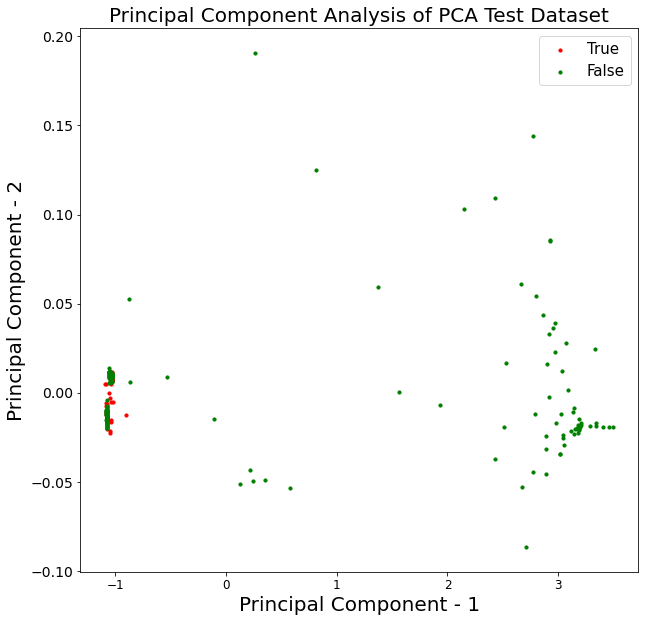

In [262]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of PCA Test Dataset",fontsize=20)
targets = [True, False]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = forpcadata['LABEL'] == target
    plt.scatter(principal_test_Df.loc[indicesToKeep, 'principal component 1']
                , principal_test_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 10)

plt.legend(targets,prop={'size': 15})

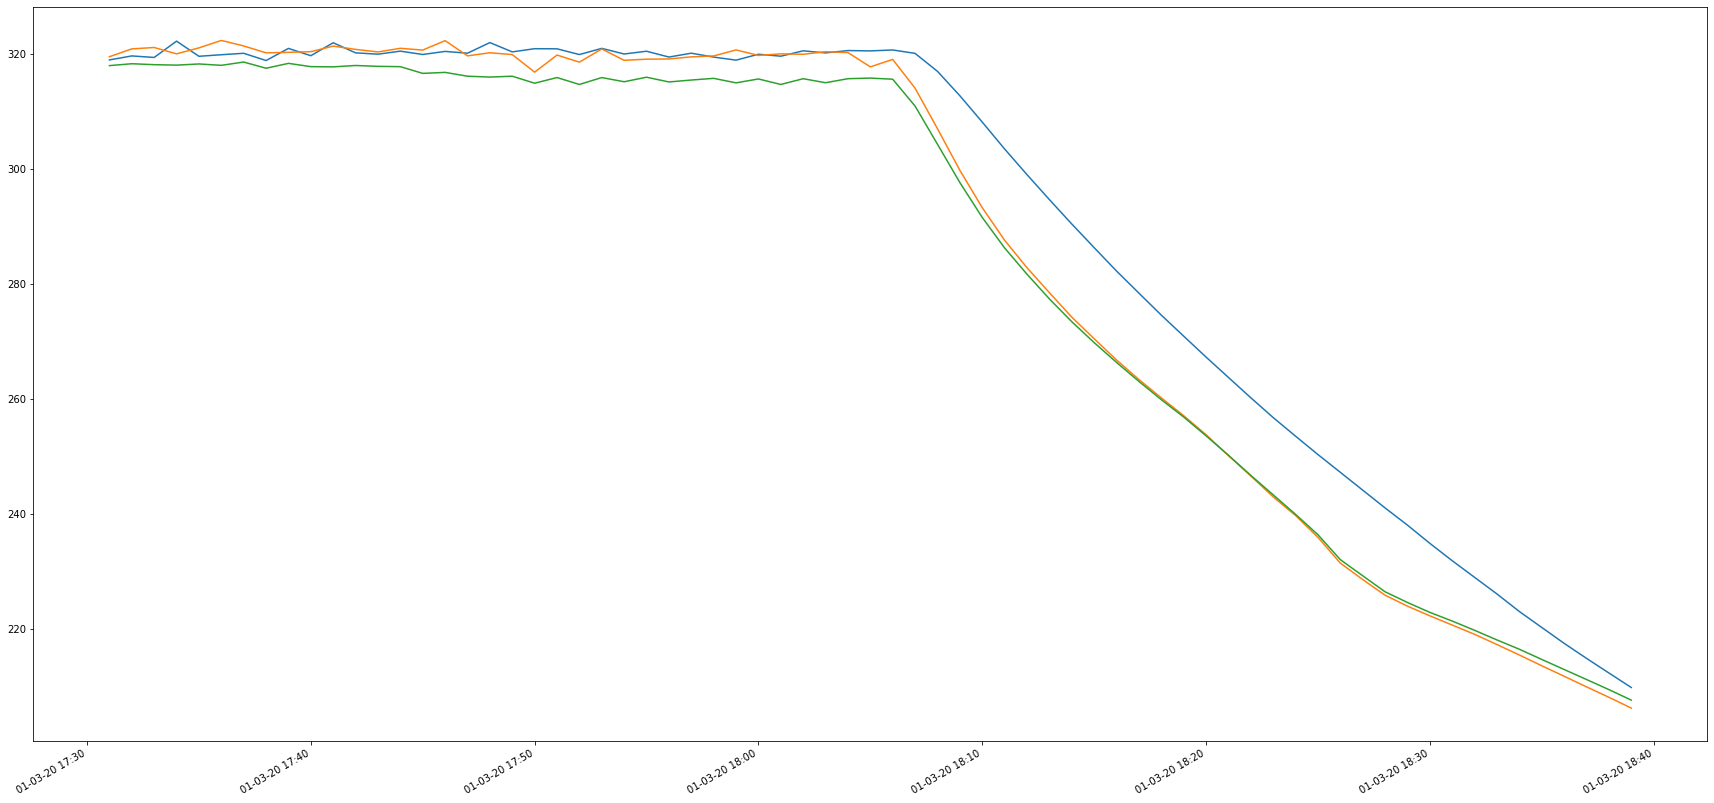

In [117]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,figsize= (30,15))
fig.autofmt_xdate()
ax.plot(testdata.index,testdata['IOS_MESHX3_AI_0005'],testdata.index,testdata['IOS_MESHX3_AI_0006  '],testdata.index,testdata['IOS_MESHX3_AI_0007'])

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)

plt.show()